In [2]:
import matplotlib.pyplot as plt
import numpy as np
import re
from tqdm import tqdm

We can do a simple analysis of what physics concepts co-occur often.

In [3]:
def keep_words_with_underscore(input_string):
    # Define a regular expression pattern to match words with underscores
    pattern = r'\b\w*_[\w_]*\b'

    # Use re.findall to extract words that match the pattern
    matching_words = re.findall(pattern, input_string)

    # Join the matching words to form the final string
    result = ' '.join(matching_words)

    return result


def update_co_occurrences(word_year_list,word_co_occurrences):
    # Iterate through the words in the list
    word_list = word_year_list[0]
    year = word_year_list[1]
    
    for word in word_list:
        # If the word is not already in the dictionary, add it with an empty list
        if word not in word_co_occurrences:
            word_co_occurrences[word] = {}
        
        # Add words from the list to the co-occurrence list for the current word
        for other_word in word_list:
            # if other_word != word and other_word not in word_co_occurrences[word]:
            #     word_co_occurrences[word].append(other_word)
            if other_word != word and other_word not in word_co_occurrences[word]:
                word_co_occurrences[word][other_word] = [year] 
            
            elif other_word != word and other_word in word_co_occurrences[word]:
                # word_co_occurrences[word][other_word][0] +=1
                word_co_occurrences[word][other_word].append(year)


In [5]:
ngram_abstracts = np.load("files/ngram_abstracts_repl.npy")
year_arr = np.load("files/year_arr.npy")

In [10]:
ocurr_arr = []
for abstract, year in zip(ngram_abstracts, year_arr):
    temp = keep_words_with_underscore(abstract)
    if temp.count(" ")>0:
        temp = temp.split(" ") 
        ocurr_arr.append([list(filter(("_").__ne__, temp)),year])

                        
word_co_occurrences = {}

for word_list in ocurr_arr:
    update_co_occurrences(word_list,word_co_occurrences)



As an example: co-occurances of the concept "phase_transition"

critical_point 1397
phase_diagram 1196
many_body 1021
one_dimensional 879
base_on 853
mean_field 783
first_order 752
two_dimensional 712
magnetic_field 709
critical_exponent 567
long_range 560
non_equilibrium 546
optical_lattice 533
non_hermitian 512
finite_temperature 503
finite_size 492


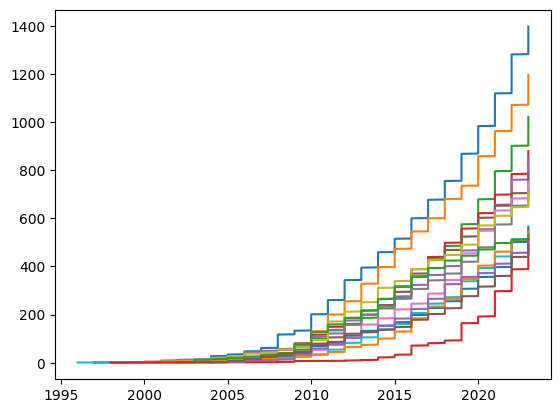

In [8]:
d = word_co_occurrences["phase_transition"]
cnt = 0 
for k in sorted(d, key=lambda k: len(d[k]), reverse=True):
    print (k,len(d[k]))

    plt.plot(sorted(d[k]), np.cumsum(np.ones_like(sorted(d[k]))))
    cnt += 1 

    if cnt > 15:
        break 